# Resumes:  EDA, Data Wrangling and Feature Engineering

In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline

import re
import datetime
from datetime import date
from time import strptime

import RAKE as rake
import operator


# Step 1. EDA
* First removing nulls
* making dataset 'even' by- 
        --dropping row/ columns 
        --imputing values as needed

In [30]:
# First reading my resume csv
resume = pd.read_csv('resume_data/master_resume_data.csv')

In [31]:
#initial info
resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14798 entries, 0 to 14797
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Resume_title            14798 non-null  object
 1   City                    14798 non-null  object
 2   State                   14798 non-null  object
 3   Description             14798 non-null  object
 4   work_experiences        14798 non-null  object
 5   Educations              14796 non-null  object
 6   Skills                  14796 non-null  object
 7   Links                   14796 non-null  object
 8   Certificates            14796 non-null  object
 9   Additional Information  14796 non-null  object
dtypes: object(10)
memory usage: 1.1+ MB


### As, noticed, there are null values in dataset. So very first step is to study nulls and -remove or impute.

In [32]:
#checking null rows
resume[resume.isnull().any(axis=1)]

,Resume_title,City,State,Description,work_experiences,Educations,Skills,Links,Certificates,Additional Information
4701,Independent Consultant,Chennai,Tamil Nadu,Name: Gopalan Lakshmipathy \n \nEmail Id: Gopa...,"{0: [{'wtitle:': 'Independent Consultant'}, {'...",NaN,NaN,NaN,NaN,NaN
4723,NONE,Chennai,Tamil Nadu,NONE,{0: [{'wtitle:': 'Dean & Curriculum Developmen...,NaN,NaN,NaN,NaN,NaN


In [33]:
#dropping null rows
resume = resume.dropna()
resume = resume.reset_index(drop=True)

In [41]:
resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14796 entries, 0 to 14795
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Resume_title            14796 non-null  object
 1   City                    14796 non-null  object
 2   State                   14796 non-null  object
 3   Description             14796 non-null  object
 4   work_experiences        14796 non-null  object
 5   Educations              14796 non-null  object
 6   Skills                  14796 non-null  object
 7   Links                   14796 non-null  object
 8   Certificates            14796 non-null  object
 9   Additional Information  14796 non-null  object
dtypes: object(10)
memory usage: 1.1+ MB


## Eyeballing dataset

In [42]:
resume.head(5)

,Resume_title,City,State,Description,work_experiences,Educations,Skills,Links,Certificates,Additional Information
0,Java Developer,Tirur,Kerala,"To prove myself dedicated, worthy and energeti...","{0: [{'wtitle:': 'Java Developer'}, {'wcompany...","{0: [{'e_title:': ""Bachelor's in Bachelor of C...","['Java (Less than 1 year)', ' Jsp (Less than 1...",['https://www.linkedin.com/in/mohamed-rihan-k-...,"{0: [{'c_title:': 'Java Developer'}, {'c_durat...",\nTechnical Expertise \n• Operating Systems: W...
1,Software Developer,Bengaluru,Karnataka,Working as Software Developer at IngroInfo Sof...,"{0: [{'wtitle:': 'JAVA DEVELOPER'}, {'wcompany...",{0: [{'e_title:': 'MCA in Master of Computer A...,"['Programming Languages: Core Java', ' J2EE \n...","['http://github.com/NK-PATEL/Train_Project', '...",{},NONE
2,Java developer,Pune,Maharashtra,Looking for a challenging career which demands...,"{0: [{'wtitle:': 'Java Developer'}, {'wcompany...","{0: [{'e_title:': ""Bachelor's in Electrical En...","['ECLIPSE (1 year)', ' HIBERNATE', ' SPRING (L...",[],{},"\nTECHNICAL SKILLS \n \nFrameworks: Spring, Sp..."
3,Seeking innovative and challenging career assi...,Pune,Maharashtra,NONE,"{0: [{'wtitle:': 'Java Developer'}, {'wcompany...","{0: [{'e_title:': 'BE in Computer'}, {'e_schoo...","['GIT', ' Angular 7', ' MAVEN', ' Java', ' Jen...",[],{},NONE
4,NONE,Pune,Maharashtra,NONE,"{0: [{'wtitle:': 'Java Developer'}, {'wcompany...",{0: [{'e_title:': 'Bachelor of Engineering in ...,['Project: HR Payroll Systems Role: Java Devel...,[],{},NONE


## With initial looks of data, found that few columns are not just int / strings and might need special attention :

**1.  Nested JSONs in columns :**
        * Work Experience
        * Education
        * Certificates

**2.  List in columns :**
        * Skills
        * Links

# Step 2. Data Wrangling and Feature Engineering


I will be working on each column to understand data better.

#########################################################################################################
## a. Work experiences

**1. Read and Capture data into different variables (if needed for matching)**


**2. Generate new column- "total work experience"**
#########################################################################################################

In [43]:
resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14796 entries, 0 to 14795
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Resume_title            14796 non-null  object
 1   City                    14796 non-null  object
 2   State                   14796 non-null  object
 3   Description             14796 non-null  object
 4   work_experiences        14796 non-null  object
 5   Educations              14796 non-null  object
 6   Skills                  14796 non-null  object
 7   Links                   14796 non-null  object
 8   Certificates            14796 non-null  object
 9   Additional Information  14796 non-null  object
dtypes: object(10)
memory usage: 1.1+ MB


In [27]:
# Read each work experience
for index, rows in resume.iterrows():
    total_exp = 0 
    #pick work experience column and read it as JSON 
    work = resume['work_experiences'][index]
    try: result_work = eval(work)
    except: continue
    #print(f'resume  :  {index}')
    
# read each position, company,city, duration, desc from education in variables     
# Capture total relevant experience via parsing duration and pulling out days words and finally convert them into years
    
    for i in result_work:
        num_months=0
        #print(f'my i is  {i}')
        w_title= (result_work[i][0]['wtitle:'])
        
        w_title_n = (result_work[0][0]['wtitle:'])
        #print(w_title)
        
        w_company= (result_work[i][1]['wcompany:'])
        #print(w_company)        
        
        w_city= (result_work[i][2]['wcity:'])
        #print(w_city)     
        
        w_state= (result_work[i][3]['wstate:'])
        #print(w_state)
        
        w_duration= (result_work[i][4]['wduration:'])
        #print(w_duration)       
        duration = w_duration.split(" ")
        #print(f'len is {len(duration)}')
        #parsing 'duration' column to calculate total experience by the nature of available data        
        if (len(duration)==4 and duration[3].upper() == 'PRESENT'):
            end_date = date.today() # if 'present - take system date'
            start_month = strptime(duration[0],'%B').tm_mon
            start_date = date(int(duration[1]),start_month,1)
            #print(start_date ,'  ', end_date )
            # number of months in each job
            num_months = (end_date.year - start_date.year) * 12 + (end_date.month - start_date.month)
            #print('total months : ',num_months)
        elif (len(duration)==5): 
            start_month = strptime(duration[0],'%B').tm_mon
            start_date = date(int(duration[1]),start_month,1)
            #print(start_date)
            end_month = strptime(duration[3],'%B').tm_mon
            end_date = date(int(duration[4]),end_month,1)
            #print(start_date ,'  ', end_date )
            num_months = (end_date.year - start_date.year) * 12 + (end_date.month - start_date.month)
            #print('total months : ',num_months)            
        #total years of experience
        total_exp = total_exp + num_months
        total_exp_yrs = total_exp/12
        resume.loc[index,'total_experience']= total_exp_yrs 
        
        w_descr= (result_work[i][5]['wdescr:'])



In [34]:
resume['total_experience'] = resume['total_experience'].astype(int)

In [36]:
#resume['total_experience'].value_counts()

### As experience is too varied, I choose to bin experince in range (4 different ranges)

### Binning total experience in experince range :

* 0-1 years -0
* 1-5 years -1
* 5-10 years-2
* 10+ years -3

In [37]:
# adding experience range
arr = np.array([0,2,6,11])
resume['experience_range'] = arr.searchsorted(resume.total_experience, side='right') - 1

In [38]:
resume['experience_range'].value_counts()

0    7404
1    4455
2    1470
3    1099
Name: experience_range, dtype: int64

In [46]:
resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14796 entries, 0 to 14795
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Resume_title            14796 non-null  object 
 1   City                    14796 non-null  object 
 2   State                   14796 non-null  object 
 3   Description             14796 non-null  object 
 4   work_experiences        14796 non-null  object 
 5   Educations              14796 non-null  object 
 6   Skills                  14796 non-null  object 
 7   Links                   14796 non-null  object 
 8   Certificates            14796 non-null  object 
 9   Additional Information  14796 non-null  object 
 10  total_experience        14428 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


### As seen, there are some nulls in total experience, I will take a closer look to decide how to handle the  same.

In [47]:
#checking all nulls in total_experience
resume[resume['total_experience'].isna()]

,Resume_title,City,State,Description,work_experiences,Educations,Skills,Links,Certificates,Additional Information,total_experience
87,NONE,NONE,NONE,NONE,{},{},['NONE'],[],{},NONE,NaN
88,NONE,NONE,NONE,NONE,{},{},['NONE'],[],{},NONE,NaN
94,NONE,NONE,NONE,NONE,{},{},['NONE'],[],{},NONE,NaN
95,NONE,NONE,NONE,NONE,{},{},['NONE'],[],{},NONE,NaN
165,NONE,NONE,NONE,• Interested in the role of a Software Enginee...,{},"{0: [{'e_title:': 'NONE'}, {'e_schoolname:': '...",['NONE'],[],{},NONE,NaN
...,...,...,...,...,...,...,...,...,...,...,...
14139,NONE,NONE,NONE,NONE,{},{},['NONE'],[],{},NONE,NaN
14340,NONE,NONE,NONE,NONE,{},{},['NONE'],[],{},NONE,NaN
14341,NONE,NONE,NONE,NONE,{},{},['NONE'],[],{},NONE,NaN
14525,NONE,NONE,NONE,NONE,{},{},['NONE'],[],{},NONE,NaN


### Checking issue with total experience as null. It was found that that these rows are not having null values but instead 'none' string. So need to drop them.

In [48]:
# to visually see the data with null total experience, I found most coluns are null so i can drop it all
resume[resume['total_experience'].isna()].to_csv('total_nones.csv', index=False)

In [49]:
resume.drop(resume[resume['total_experience'].isna()].index, axis=0, inplace=True)

In [50]:
resume.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14428 entries, 0 to 14795
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Resume_title            14428 non-null  object 
 1   City                    14428 non-null  object 
 2   State                   14428 non-null  object 
 3   Description             14428 non-null  object 
 4   work_experiences        14428 non-null  object 
 5   Educations              14428 non-null  object 
 6   Skills                  14428 non-null  object 
 7   Links                   14428 non-null  object 
 8   Certificates            14428 non-null  object 
 9   Additional Information  14428 non-null  object 
 10  total_experience        14428 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.3+ MB


######################################################################################
## b. Education column 

**1. To parse education column and generate columns:**
* Doctrate 
* Post grads 
* Grads
* Others


**2. To generate specializations columns**
######################################################################################

In [85]:
#addinting new columns for doc/grad/pg
# read each row
for index, rows in resume.iterrows():
#pick education col and read it as JSON 
    edu = resume['Educations'][index]
    result_edu = eval(edu)
    
    if edu == '{}': #this code is added as some education columns are found blank - '{}' - as edu_unknown count != row count
        #print(edu)
        resume.loc[index,'edu_unknown'] = 1
        resume.loc[index,'Is_grad'] = 0
        resume.loc[index,'Is_postgrad'] = 0
        resume.loc[index,'Is_doc'] = 0
#print(edu)
    #print(f'resume  :  {index}')
    #read each title from education JSON to capture Doctrate/ post grads/ grads
    for i in result_edu:
        #print(f'my i is  {i}')
        edu_title= (result_edu[i][0]['e_title:']).lower()
        #print(edu_title)
        #for ug1 in ug:       
        if re.search('^ph.d', edu_title):
            #print("Doctrate")
            resume.loc[index,'Is_doc'] = 1
            resume.loc[index,'Is_postgrad'] = 1
            resume.loc[index,'Is_grad'] = 1
            resume.loc[index,'edu_unknown'] = 0
            break        
        elif re.search(('^m|^pg|^post '), edu_title):
            #print("Post-grad")
            resume.loc[index,'Is_doc'] = 0
            resume.loc[index,'Is_postgrad'] = 1
            resume.loc[index,'Is_grad'] = 1
            resume.loc[index,'edu_unknown'] = 0
            break
        elif re.search('^b', edu_title):
            #print("Graduate")
            resume.loc[index,'Is_grad'] = 1
            resume.loc[index,'Is_postgrad'] = 0
            resume.loc[index,'Is_doc'] = 0
            resume.loc[index,'edu_unknown'] = 0
            break
        else:
            resume.loc[index,'edu_unknown'] = 1
            resume.loc[index,'Is_grad'] = 0
            resume.loc[index,'Is_postgrad'] = 0
            resume.loc[index,'Is_doc'] = 0
        edu_school = (result_edu[i][1]['e_schoolname:'])
        edu_city = (result_edu[i][2]['e_city:'])
        edu_state = (result_edu[i][3]['e_state:'])
        edu_duration= (result_edu[i][4]['e_duration:'])

In [78]:
#resume[resume['edu_unknown'].isna()]

In [88]:
#removing nulls, for no degree setting 'edu_unknown' as 1
resume['edu_unknown'].fillna(1, inplace = True) 
resume['Is_grad'].fillna(0, inplace = True) 
resume['Is_postgrad'].fillna(0, inplace = True) 
resume['Is_doc'].fillna(0, inplace = True) 

#converting to int
resume['Is_doc'] = resume['Is_doc'].astype('int')
resume['Is_postgrad'] = resume['Is_postgrad'].astype('int')
resume['Is_grad']= resume['Is_grad'].astype('int')
resume['edu_unknown']= resume['edu_unknown'].astype('int')

In [ ]:
# Column names should match the columns in job dataset
resume.rename(columns={'Is_grad': 'is_grad','Is_postgrad': 'is_postgrad','Is_doc': 'is_doc'}, inplace=True) 

### Parsing education to find and add specialization 

**For the purpose of making it simple, I choose to have the following specialiations :**
* Comuter_Eng - that have specialization in computers or any engineering
* Finance
* HR
* AI_Stats - any thing related to data science
* MBA - Any business masters
* others


In [89]:
#adding Specialization 
# read each row
for index, rows in resume.iterrows():
    #pick education col and read it as JSON 
    edu = resume['Educations'][index]
    if edu == '{}': #this code is added as some education columns are found blank - '{}' - as edu_unknown count != row count
        resume.loc[index,'Computer_Eng'] = 0
        resume.loc[index,'Finance'] = 0
        resume.loc[index,'HR'] = 0
        resume.loc[index,'AI_stats'] = 0
        resume.loc[index,'MBA'] = 0
        resume.loc[index,'Other_specialization'] = 1    
    try: result_edu = eval(edu)
    except: continue
#print(edu)
    #print(f'resume  :  {index}')
    #read each title from education JSON to capture Doctrate/ post grads/ grads
    for i in result_edu:
        #print(f'my i is  {i}')
        edu_title= (result_edu[i][0]['e_title:'])
        edu_title=edu_title.lower()
        #print(edu_title)       
        if re.search('computer|information|tech|b.e|software|b.c.a|mca|bca|m.c.a|cse|electronics|c.s.e|engineering|be', edu_title):
            #print("Doctrate")
            resume.loc[index,'Computer_Eng'] = 1
            resume.loc[index,'Finance'] = 0
            resume.loc[index,'HR'] = 0
            resume.loc[index,'AI_stats'] = 0
            resume.loc[index,'MBA'] = 0
            resume.loc[index,'Other_specialization'] = 0
            break        
        elif re.search('finance|commerce|account|ca|.com$', edu_title):
            #print("Post-grad")
            resume.loc[index,'Computer_Eng'] = 0
            resume.loc[index,'Finance'] = 1
            resume.loc[index,'HR'] = 0
            resume.loc[index,'AI_stats'] = 0
            resume.loc[index,'MBA'] = 0
            resume.loc[index,'Other_specialization'] = 0
            break
        elif re.search('human|h.r|hr', edu_title):
            #print("Graduate")
            resume.loc[index,'Computer_Eng'] = 0
            resume.loc[index,'Finance'] = 0
            resume.loc[index,'HR'] = 1
            resume.loc[index,'AI_stats'] = 0
            resume.loc[index,'MBA'] = 0
            resume.loc[index,'Other_specialization'] = 0
            break
        elif re.search('mba|m.b.a|pgdm|business', edu_title):
            #print("Graduate")
            resume.loc[index,'Computer_Eng'] = 0
            resume.loc[index,'Finance'] = 0
            resume.loc[index,'HR'] = 0
            resume.loc[index,'AI_stats'] = 0
            resume.loc[index,'MBA'] = 1
            resume.loc[index,'Other_specialization'] = 0            
            break
        elif re.search('math|stats|ai|intelligence|big|cloud|data|machine|analytics', edu_title):
            #print("Graduate")
            resume.loc[index,'Computer_Eng'] = 0
            resume.loc[index,'Finance'] = 0
            resume.loc[index,'HR'] = 0
            resume.loc[index,'AI_stats'] = 1
            resume.loc[index,'MBA'] = 0
            resume.loc[index,'Other_specialization'] = 0
            break
        else:
            resume.loc[index,'Other_specialization'] = 1
            resume.loc[index,'Computer_Eng'] = 0
            resume.loc[index,'Finance'] = 0
            resume.loc[index,'HR'] = 0
            resume.loc[index,'AI_stats'] = 0
            resume.loc[index,'MBA'] = 0

In [90]:
resume.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14428 entries, 0 to 14795
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Resume_title            14428 non-null  object 
 1   City                    14428 non-null  object 
 2   State                   14428 non-null  object 
 3   Description             14428 non-null  object 
 4   work_experiences        14428 non-null  object 
 5   Educations              14428 non-null  object 
 6   Skills                  14428 non-null  object 
 7   Links                   14428 non-null  object 
 8   Certificates            14428 non-null  object 
 9   Additional Information  14428 non-null  object 
 10  total_experience        14428 non-null  float64
 11  Is_grad                 14428 non-null  int32  
 12  Is_postgrad             14428 non-null  int32  
 13  Is_doc                  14428 non-null  int32  
 14  edu_unknown             14428 non-null

In [92]:
#converting specializations to int
resume['Computer_Eng']=resume['Computer_Eng'].astype('int')
resume['Finance']=resume['Finance'].astype('int')
resume['HR']=resume['HR'].astype('int')
resume['AI_stats']=resume['AI_stats'].astype('int')
resume['MBA']=resume['MBA'].astype('int')
resume['Other_specialization']=resume['Other_specialization'].astype('int')

In [ ]:
#removing nulls, for no specialization setting 'Other_specialization' as 1
resume['Other_specialization'].fillna(1, inplace = True) 
resume['Computer_Eng'].fillna(0, inplace = True) 
resume['Finance'].fillna(0, inplace = True) 
resume['HR'].fillna(0, inplace = True) 
resume['AI_stats'].fillna(0, inplace = True) 
resume['MBA'].fillna(0, inplace = True) 


In [ ]:
# resume[resume['Others'].isna()]

In [93]:
resume_temp1 = resume.copy()

In [94]:
resume_temp1.to_csv('resume_with_total_exp_education.csv', index=False)

###############################################################################
## c. Resume Title Column 

This column is very important to any resume. On analysis, I find that there are lot of similar titles that appeared differently in this column like :
* Java developer
* java dev
###############################################################################

In [246]:
#resume_temp1 = resume.copy() - saving data worked time to time

In [247]:
# lowering all titles
resume['Resume_title'] = resume['Resume_title'].str.lower()

In [248]:
#finding unique values
resume['Resume_title'].nunique()

3200

In [249]:
#checking value counts for each unique title
resume['Resume_title'].value_counts()

none                                             7674
php developer                                     379
software developer                                261
python developer                                  207
web developer                                     176
                                                 ... 
marketing, aimla - pgpm                             1
marketing manager                                   1
nodejs developer with 1+ years of experience.       1
web and php developer                               1
python,java, javascript                             1
Name: Resume_title, Length: 3200, dtype: int64

### I see "None" in title - that implies nothing so decided : to get latest title from Work Experience

In [250]:
# read each work experience
for index, rows in resume.iterrows():
    #pick work experience col and read it as JSON 
    work = resume['work_experiences'][index]
    try: result_work = eval(work)
    except: continue
    #print(f'resume  :  {index}')
    #read first position ti fill in resume title 
    
    for i in result_work:
        num_months=0
        #print(f'my i is  {i}')
        w_title= (result_work[i][0]['wtitle:']).lower()
        w_title_n = (result_work[0][0]['wtitle:']).lower()

        #print(w_descr)
        if (resume.at[index,'Resume_title']=='none'):
            resume.at[index,'Resume_title']=w_title_n

In [40]:
# getting csv so if i have to re-run, i can start from here.
# resume_latest = resume.copy()
# resume_latest.to_csv('wip/latest_sorted_resume.csv', index=False)

In [84]:
#resume = pd.read_csv('wip/latest_sorted_resume.csv')

In [85]:
resume['Resume_title'].value_counts()

php developer                                                                                                                                                                                                                                                 1217
software developer                                                                                                                                                                                                                                             965
java developer                                                                                                                                                                                                                                                 933
python developer                                                                                                                                                                                                               

In [4]:
resume['Resume_title'].nunique()

4513

In [5]:
resume.reset_index(inplace=True)

In [7]:
resume['resume_id']= resume.index

In [9]:
# resume_temp4 = resume.copy()
# resume_temp4.to_csv('wip/resume_sorted4.csv', index=False)

In [41]:
resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14428 entries, 0 to 14427
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   index                   14428 non-null  int64 
 1   Resume_title            14428 non-null  object
 2   City                    14428 non-null  object
 3   State                   14428 non-null  object
 4   Description             14428 non-null  object
 5   work_experiences        14428 non-null  object
 6   Educations              14428 non-null  object
 7   Skills                  14428 non-null  object
 8   Links                   14428 non-null  object
 9   Certificates            14428 non-null  object
 10  Additional Information  14428 non-null  object
 11  Is_grad                 14428 non-null  int64 
 12  Is_postgrad             14428 non-null  int64 
 13  Is_doc                  14428 non-null  int64 
 14  edu_unknown             14428 non-null  int64 
 15  Co

##########################################################################################################################

## d. City / State

There were multiple discrepancies observed in State / City column.

So I decided to:
* get all cities
* map to respective states
* provide them uniques location code (to match with job location). 
**Challenge** - Location code should be same in job and resume dataset to make sense and match properly. 


## Created following datasets, and use the same for both datasets (resume and job)
* **India-state-city dataset** used in jobs dataset. In resume, we are provided with States
* **State - State-id dataset**



########################################################################################################################

In [135]:
# reading my sorted resume csv
resume = pd.read_csv('wip/resume_sorted4.csv')

In [99]:
resume['City'].value_counts()

Bengaluru       2033
Pune            1569
NONE            1452
Hyderabad       1342
Mumbai           745
                ... 
Mahuva             1
Kothakota          1
Kodungallur        1
Karamadai          1
West Chester       1
Name: City, Length: 799, dtype: int64

### Renaming State to location - to match with jobs. 

In [138]:
resume.rename(columns={'State': 'location'}, inplace=True)
resume['location'].value_counts()

 maharashtra    3040
 karnataka      2162
none            1452
 telangana      1369
 tamil nadu     1284
                ... 
 mn                1
 nc                1
 ga                1
ar                 1
 pitampura         1
Name: location, Length: 75, dtype: int64

In [139]:
resume['location'] = resume['location'].str.strip()

### Read and used 'State' dataset to get unique state ids to match with jobs. Common dataset has to be used so that ids remain same.

In [140]:
# reading self-created data-set for states
state = pd.read_csv('state.csv')

In [142]:
state['State'] =state['State'].str.lower()

In [143]:
#creating state dict
state_dict = pd.Series(state.State_id.values,index=state.State).to_dict()

In [153]:
#state_dict

In [145]:
resume.head()

,index,Resume_title,City,location,Description,work_experiences,Educations,Skills,Links,Certificates,...,edu_unknown,Computer_Eng,Finance,HR,AI_stats,MBA,Other_specialization,resume_id,total_experience,experience_range
0,0,java developer,Tirur,kerala,"To prove myself dedicated, worthy and energeti...","{0: [{'wtitle:': 'Java Developer'}, {'wcompany...","{0: [{'e_title:': ""Bachelor's in Bachelor of C...","['java (less than 1 year)', ' jsp (less than 1...",['https://www.linkedin.com/in/mohamed-rihan-k-...,"{0: [{'c_title:': 'Java Developer'}, {'c_durat...",...,0,1,0,0,0,0,0,0,0,0
1,1,software developer,Bengaluru,karnataka,Working as Software Developer at IngroInfo Sof...,"{0: [{'wtitle:': 'JAVA DEVELOPER'}, {'wcompany...",{0: [{'e_title:': 'MCA in Master of Computer A...,"['programming languages: core java', ' j2ee \n...","['http://github.com/NK-PATEL/Train_Project', '...",{},...,0,1,0,0,0,0,0,1,1,0
2,2,java developer,Pune,maharashtra,Looking for a challenging career which demands...,"{0: [{'wtitle:': 'Java Developer'}, {'wcompany...","{0: [{'e_title:': ""Bachelor's in Electrical En...","['eclipse (1 year)', ' hibernate', ' spring (l...",[],{},...,0,1,0,0,0,0,0,2,0,0
3,3,seeking innovative and challenging career assi...,Pune,maharashtra,NONE,"{0: [{'wtitle:': 'Java Developer'}, {'wcompany...","{0: [{'e_title:': 'BE in Computer'}, {'e_schoo...","['git', ' angular 7', ' maven', ' java', ' jen...",[],{},...,0,1,0,0,0,0,0,3,2,1
4,4,java developer,Pune,maharashtra,NONE,"{0: [{'wtitle:': 'Java Developer'}, {'wcompany...",{0: [{'e_title:': 'Bachelor of Engineering in ...,['project: hr payroll systems role: java devel...,[],{},...,0,1,0,0,0,0,0,4,5,1


In [146]:
# Finally replaced locations as states ids
resume = resume.replace({"location": state_dict}) 
#resume['loc_id'] = resume['location'].map(state_dict)

In [147]:
resume['location'].value_counts()

20              3040
16              2162
none            1452
telangana       1369
30              1284
                ... 
wisconsin          1
pallikaranai       1
navi mumbai        1
de                 1
mn                 1
Name: location, Length: 71, dtype: int64

#### I have got location ids here. But for reporting purposes I would still need State name. Adding loc name as state name from state dict.

In [148]:
#creating city state dict
state_dict_1 = pd.Series(state.State.values,index=state.State_id).to_dict()

In [132]:
#state_dict_1

In [149]:
resume['loc_name'] = resume['location'].map(state_dict_1)

In [150]:
resume['loc_name']

0             kerala
1          karnataka
2        maharashtra
3        maharashtra
4        maharashtra
            ...     
14423         kerala
14424            NaN
14425    west bengal
14426            NaN
14427    west bengal
Name: loc_name, Length: 14428, dtype: object

In [151]:
resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14428 entries, 0 to 14427
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   index                   14428 non-null  int64 
 1   Resume_title            14428 non-null  object
 2   City                    14428 non-null  object
 3   location                14428 non-null  object
 4   Description             14428 non-null  object
 5   work_experiences        14428 non-null  object
 6   Educations              14428 non-null  object
 7   Skills                  14428 non-null  object
 8   Links                   14428 non-null  object
 9   Certificates            14428 non-null  object
 10  Additional Information  14428 non-null  object
 11  is_grad                 14428 non-null  int64 
 12  is_postgrad             14428 non-null  int64 
 13  is_doc                  14428 non-null  int64 
 14  edu_unknown             14428 non-null  int64 
 15  Co

In [2]:
resume.loc[resume['location'] == 'none', 'location'] = 1
resume['location']=resume['location'].replace(regex='([a-zA-Z])', value=0)
resume['loc_name'].fillna('india' , inplace = True) 

In [152]:
# resume_temp4 = resume.copy()
# resume_temp4.to_csv('wip/resume_sorted4.csv', index=False)

##########################################################################################################################

## e. Skills


For now, decided to keep skills as is. Just lowering the str values.

##########################################################################################################################

In [277]:
# resume['Skills'].nunique()
resume['Skills'].value_counts()

['none']                                                                                                                                                                                                                                                                                                                                                                                                     1532
['hdfs', ' sqoop', ' clustering', ' data mining', ' data science']                                                                                                                                                                                                                                                                                                                                             60
['java']                                                                                                                                                                                            

In [13]:
resume['Skills']=resume['Skills'].str.lower()

##########################################################################################################################

## e. Description, certificates, links, Additional information


For now, decided to keep them as is. Will work on it as needed to match with Job descriptions.

##########################################################################################################################

In [ ]:
#removing nulls
#resume.drop(resume.columns[0], axis = 1, inplace = True) 

In [56]:
unique_title = resume['Resume_title'].unique().tolist()

In [57]:
len(unique_title)

4513

In [59]:
unique_title.sort()

In [60]:
from fuzzywuzzy import process, fuzz

C:\Users\shail\anaconda\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [1]:
#Create tuples of resume titles, matched titles names, and the score
title_score_sort = [(x,) + i
             for x in unique_title 
             for i in process.extract(x, unique_title, scorer=fuzz.token_sort_ratio)]
#Create a dataframe from the tuples
title_similarity_sort = pd.DataFrame(title_score_sort, columns=['title_orinigal','title_checked','title_score_sort'])

In [113]:
title_similarity_sort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22565 entries, 0 to 22564
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title_new         22565 non-null  object
 1   title_original    22565 non-null  object
 2   title_score_sort  22565 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 529.0+ KB


In [70]:
title_similarity_sort.head()

,title_original1,title_checked,title_score_sort
0,java developer,java developer,100
1,java developer,developer( java),100
2,java developer,java devloper,96
3,java developer,sr java developer,90
4,java developer,jr java developer,90


In [76]:
new_score = title_similarity_sort[title_similarity_sort['title_score_sort']>80]

In [77]:
new_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10056 entries, 0 to 22560
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title_original1   10056 non-null  object
 1   title_checked     10056 non-null  object
 2   title_score_sort  10056 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 314.2+ KB


In [66]:
title_similarity_sort=pd.read_csv('wip/resume_title.csv')

In [69]:
title_similarity_sort.rename({'title_new':'title_original1','title_original':'title_checked'},axis=1,inplace = True)

In [74]:
# resume['resume_title_new']=(title_similarity_sort['title_score_sort']>80
#                             & title_similarity_sort['title_checked'] == resume['Resume_title'], 
#                             title_similarity_sort['title_original1'] )

In [ ]:
for i in range(new_score.shape[0]):
    if new_score['title_score_sort'][i] >= 80 & new_score['title_checked'][i] is in new_score['title_new']:
        where new_score['title_original1']=[new_score['title_checked'][i]], replace with new_score['title_original1'][i]

In [ ]:
unique_original_titles=title_original.unique
unique_new_titles=title_new.unique
for title in title_old:
 if score >80:
    for unique in title_new:
    {unique: values where score>80}
     if values is in unique_original_titles:
        remove value from list

In [71]:
resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14428 entries, 0 to 14427
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   index                   14428 non-null  int64 
 1   Resume_title            14428 non-null  object
 2   City                    14428 non-null  object
 3   location                14428 non-null  object
 4   Description             14428 non-null  object
 5   work_experiences        14428 non-null  object
 6   Educations              14428 non-null  object
 7   Skills                  14428 non-null  object
 8   Links                   14428 non-null  object
 9   Certificates            14428 non-null  object
 10  Additional Information  14428 non-null  object
 11  is_grad                 14428 non-null  int64 
 12  is_postgrad             14428 non-null  int64 
 13  is_doc                  14428 non-null  int64 
 14  edu_unknown             14428 non-null  int64 
 15  Co

In [115]:
title_similarity_sort['title_original'].nunique()

4503

In [116]:
title_similarity_sort['title_new'].nunique()

4513

In [140]:
title_similarity_sort.to_csv('resume_title.csv', index=False)

## As my fuzzy -wuzzy not working so I choose to go for 3 different resume titles 
1. Java
2. .net
3. python
4. php

In [232]:
# pullin java
resume_java = resume.loc[resume['Resume_title'].str.contains('java', na=False)]
resume_java.to_csv('resume_java.csv', index=False)
resume_java['Resume_title'] = 'java developer'
resume.loc[resume.Resume_title.str.contains('java', na=False), "Resume_title"] = "java developer"

C:\Users\shail\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [233]:
### Now .net 
resume_net = resume.loc[resume['Resume_title'].str.match('\.net.*dev|dev.*\.net')]
resume_net.to_csv('resume_net.csv', index=False)
resume_net['Resume_title'] = '.net developer'
resume.loc[resume['Resume_title'].str.match('\.net.*dev|dev.*\.net'), "Resume_title"] = ".net developer"

C:\Users\shail\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [234]:
### Now python
resume_python = resume.loc[resume['Resume_title'].str.match('python.*dev|dev.*python')]
resume_python.to_csv('resume_python.csv', index=False)
resume_python['Resume_title'] = 'python developer'
resume.loc[resume['Resume_title'].str.match('python.*dev|dev.*python'), "Resume_title"] = "python developer"


C:\Users\shail\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [235]:
### Now php
resume_php = resume.loc[resume['Resume_title'].str.match('php.*dev|dev.*php')]
resume_php.to_csv('resume_php.csv', index=False)
resume_php['Resume_title'] = 'php developer'
resume.loc[resume['Resume_title'].str.match('php.*dev|dev.*php'), "Resume_title"] = "php developer"

C:\Users\shail\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [245]:
t= resume.copy()
t.to_csv('resume with 4 titles worked.csv', index=False)

In [236]:
resume['Resume_title'].value_counts()

php developer                                                                                                                                                                                                      1516
java developer                                                                                                                                                                                                     1477
python developer                                                                                                                                                                                                   1113
software developer                                                                                                                                                                                                  965
developer                                                                                                                               

In [237]:
r_df = pd.concat([resume_java,resume_net,resume_python,resume_php],ignore_index=True)

In [238]:
r_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4149 entries, 0 to 4148
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Resume_title            4149 non-null   object 
 1   City                    4149 non-null   object 
 2   State                   4149 non-null   object 
 3   Description             4149 non-null   object 
 4   work_experiences        4149 non-null   object 
 5   Educations              4149 non-null   object 
 6   Skills                  4149 non-null   object 
 7   Links                   4149 non-null   object 
 8   Certificates            4149 non-null   object 
 9   Additional Information  4149 non-null   object 
 10  total_experience        4149 non-null   float64
 11  Is_grad                 4149 non-null   int32  
 12  Is_postgrad             4149 non-null   int32  
 13  Is_doc                  4149 non-null   int32  
 14  edu_unknown             4149 non-null   

In [239]:
r_df.to_csv('r_df.csv', index=False)

In [240]:
r_df['Resume_title'].value_counts()

php developer       1516
java developer      1477
python developer    1113
.net developer        43
Name: Resume_title, dtype: int64

Text(0, 0.5, 'Number of Jobs')

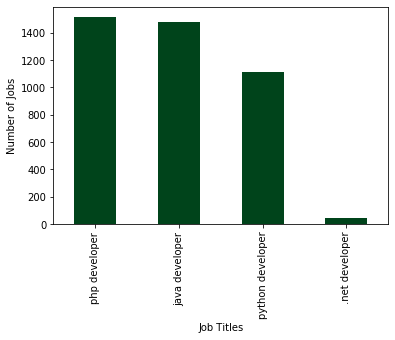

In [243]:
r_df['Resume_title'].value_counts().plot(cmap='Greens_r',kind='bar')
plt.xlabel("Job Titles")
#plt.xticks(rotation=0)
plt.ylabel("Number of Jobs")

Text(0, 0.5, 'Number of Jobs')

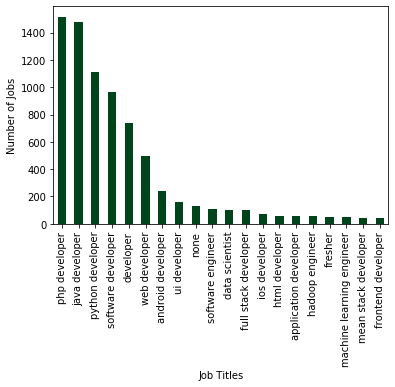

In [244]:
resume['Resume_title'].value_counts()[:20].plot(cmap='Greens_r',kind='bar')
plt.xlabel("Job Titles")
#plt.xticks(rotation=0)
plt.ylabel("Number of Jobs")

In [394]:
#title_similarity_sort.rename({'title_original':'Resume_title'},axis=1,inplace=True)

In [453]:
#temp_df1 = title_similarity_sort.drop_duplicates(subset='Resume_title')

In [398]:
#n=title_similarity_sort.copy()

In [ ]:
# #n.['t_new_sorted']= ='x'
# n['a']= n.loc[n['title_score_sort']>80, "title_new"]
# #, n['Resume_title']] = n['title_new']
# n.head(20)

In [440]:
#temp_df1 = n.drop_duplicates(subset='Resume_title')

In [448]:
#r1=r1.merge(temp_df , on = ['Resume_title'], how='left')

We have sorted titles and scores in 'title_similarity_sort' and we have to merge in master dataset that's resume

In [363]:
#temp_df = title_similarity_sort.drop_duplicates(subset='Resume_title')